In [17]:
import h5py
import math
import prettytable
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
with h5py.File('dam-break-2d.hdf5', 'r') as h5f:
    pA  = h5f['particleArray'][:]
    x   = h5f['x'][:]
    y   = h5f['y'][:]
    p   = h5f['p'][:]
    dta = h5f['dt_a'][:]
    dtc = h5f['dt_c'][:]
    dtf = h5f['dt_f'][:]
    stl = h5f['settleTime'][()]

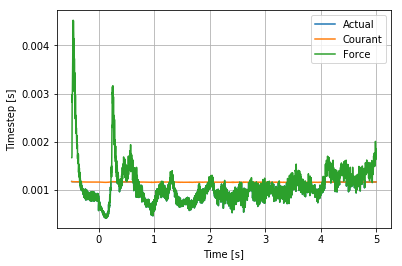

In [13]:
t = np.cumsum(dta) - stl
dtf[0] = dtf[1]
plt.plot(t, dta)
plt.plot(t, dtc)
plt.plot(t, dtf)
plt.grid()
plt.xlabel('Time [s]')
plt.ylabel('Timestep [s]')
plt.legend(['Actual', 'Courant', 'Force']);

In [15]:
# Compute the target times
t_s = np.array([0.71, 1.39, 2.10, 3.10])
times = t_s * math.sqrt(25 / 9.81)

# Indexes of fluid particles
ind = pA['label'] == 0

# Find the times in our time series
t = -stl; t_i: int = 0; t_a = []
h = []; z = []
for i in range(len(x)):
    if t >= times[t_i]:
        t_a.append(t)
        h.append(np.max(y[i, ind]))
        z.append(np.max(x[i, ind]))
        t_i += 1
        
        if t_i == 4:
            break
    t += dta[i]

In [20]:
# Create a table
T = prettytable.PrettyTable()
T.add_column('Time [s]', t_s)
T.add_column('Time actual [s]', np.round(times, 2))
T.add_column('H (exp)', [0.90, 0.76, 0.57, 0.32])
T.add_column('H (SPH)', [0.90, 0.75, 0.56, 0.37])
T.add_column('H (JJK)', np.round(np.array(h) / 25, 2))
T.add_column('Z (exp)', [1.33, 2.25, 3.22, 4.80])
T.add_column('Z (SPH)', [1.56, 2.50, 3.75, 5.00])
T.add_column('Z (JJK)', np.round(np.array(z) / 25, 2))
print(T)

+----------+-----------------+---------+---------+---------+---------+---------+---------+
| Time [s] | Time actual [s] | H (exp) | H (SPH) | H (JJK) | Z (exp) | Z (SPH) | Z (JJK) |
+----------+-----------------+---------+---------+---------+---------+---------+---------+
|   0.71   |       1.13      |   0.9   |   0.9   |   0.99  |   1.33  |   1.56  |   1.63  |
|   1.39   |       2.22      |   0.76  |   0.75  |   0.89  |   2.25  |   2.5   |   2.69  |
|   2.1    |       3.35      |   0.57  |   0.56  |   0.77  |   3.22  |   3.75  |   4.05  |
|   3.1    |       4.95      |   0.32  |   0.37  |   0.58  |   4.8   |   5.0   |   6.12  |
+----------+-----------------+---------+---------+---------+---------+---------+---------+
